In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [28]:
df=pd.read_csv("patient_dataset.csv")
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


In [29]:
print(df.shape)
print(df.columns)

(6000, 16)
Index(['age', 'gender', 'chest_pain_type', 'blood_pressure', 'cholesterol',
       'max_heart_rate', 'exercise_angina', 'plasma_glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'residence_type', 'smoking_status'],
      dtype='object')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

In [31]:
df.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [ ]:
num_cols = ['plasma_glucose', 'skin_thickness', 'insulin']
for col in num_cols:
    mean = df[col].mean()
    df[col]=df[col].fillna(mean)

In [ ]:
cat_cols = ['gender', 'residence_type']
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col]=df[col].fillna(mode)

In [34]:
df.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
numeric_cols = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate',
                'plasma_glucose', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']
categorical_cols = ['gender', 'chest_pain_type', 'exercise_angina',
                    'hypertension', 'heart_disease', 'residence_type', 'smoking_status']

skew_values = df[numeric_cols].skew()
print("Skewness of numeric columns:\n", skew_values)

Skewness of numeric columns:
 age                  0.030718
blood_pressure       0.089403
cholesterol          0.005312
max_heart_rate       0.007490
plasma_glucose      -0.042959
skin_thickness      -0.010537
insulin              0.025759
bmi                  0.003675
diabetes_pedigree   -0.001205
dtype: float64


In [37]:
binary_cols = ['gender', 'exercise_angina', 'hypertension', 'heart_disease', 'residence_type','chest_pain_type', 'smoking_status']
le_dict = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


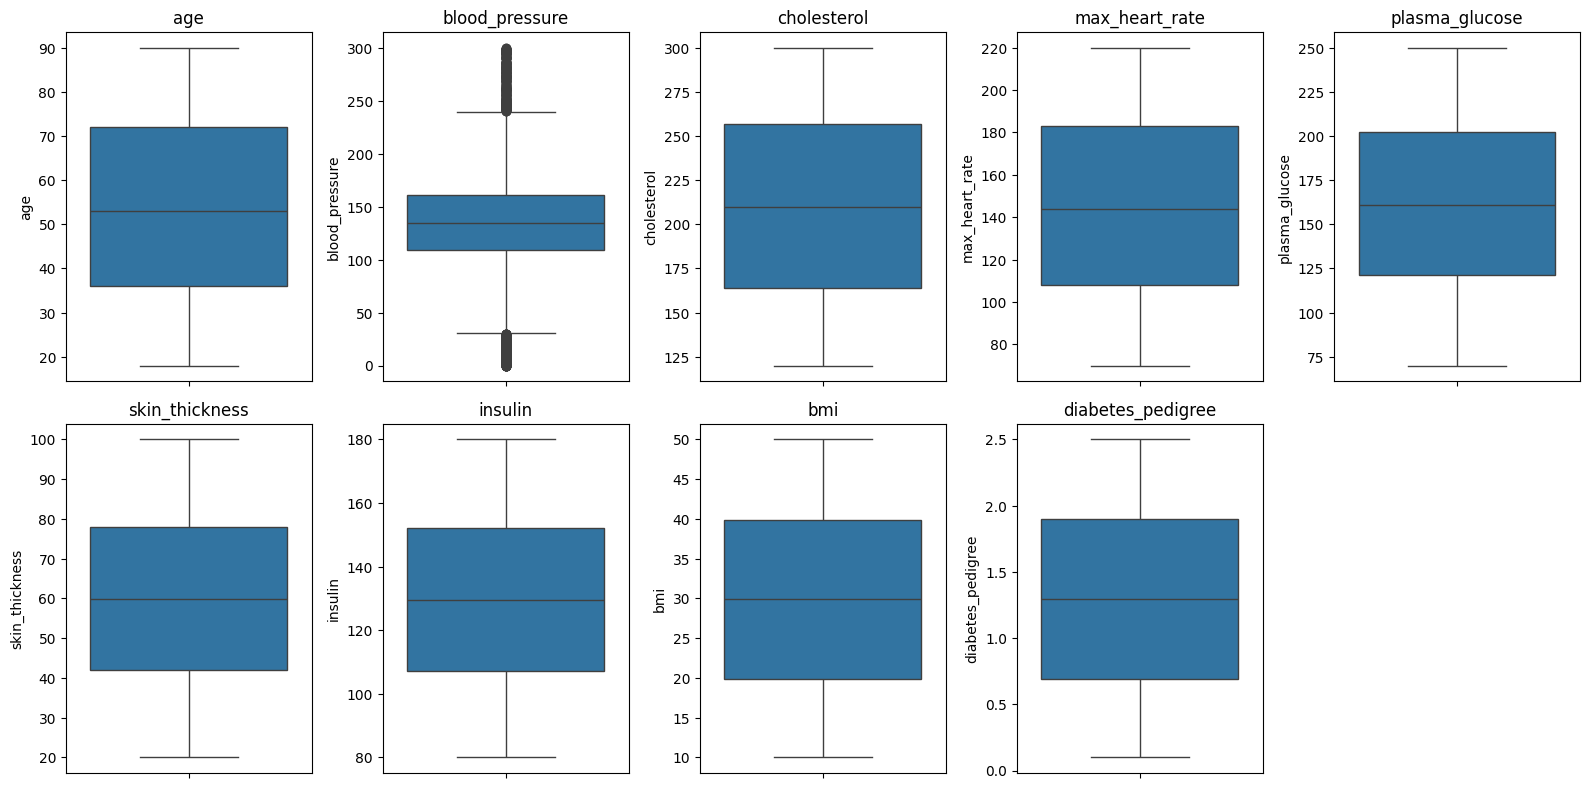

In [38]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

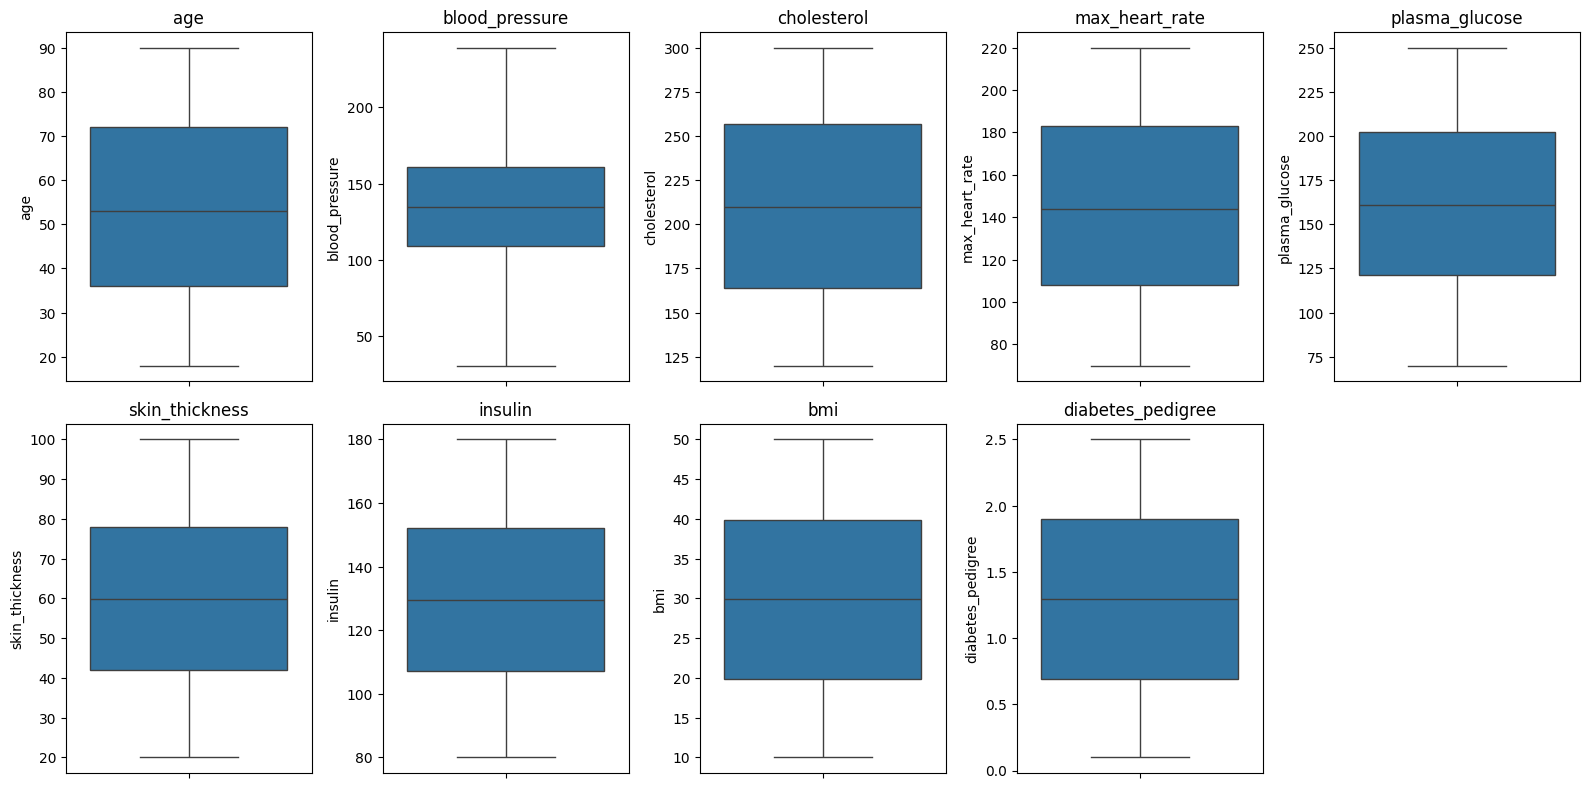

In [40]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [41]:
X = df.drop(columns=['heart_disease'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

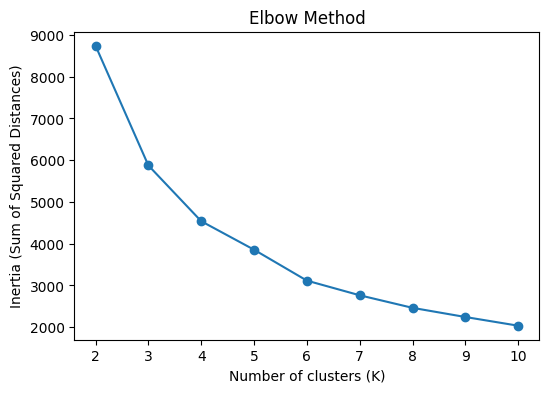

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,adjusted_rand_score
inertia = []
K_range = range(2, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method")
plt.show()

In [44]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_pca)
print(df['kmeans_cluster'].value_counts())

kmeans_cluster
1    3088
0    2912
Name: count, dtype: int64


In [45]:
sil_score_km = silhouette_score(X_pca, df['kmeans_cluster'])
print(f"Silhouette Score: {sil_score_km:.3f}")

Silhouette Score: 0.309


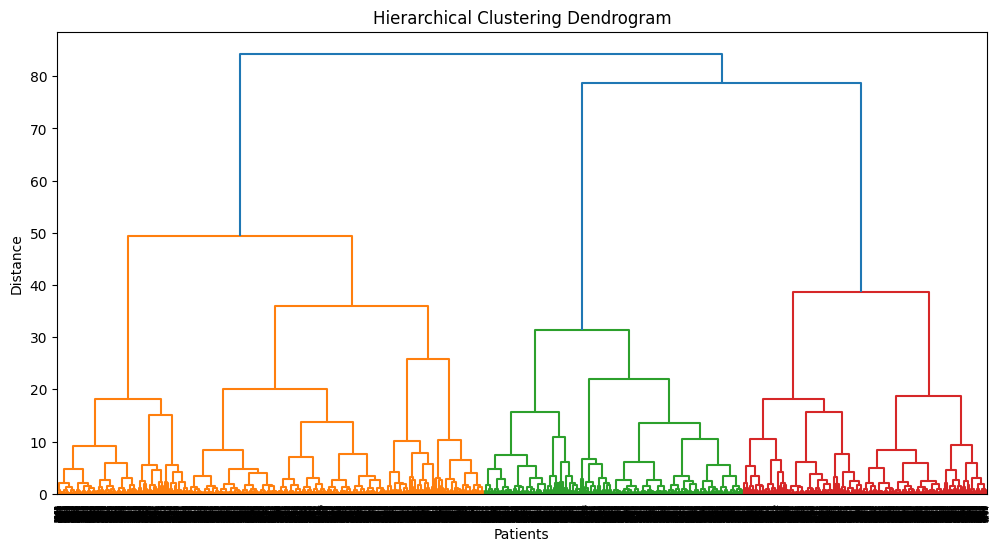

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
Z = linkage(X_pca, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()

In [47]:
df['hier_cluster'] = fcluster(Z, t=2, criterion='maxclust')
print(df['hier_cluster'].value_counts())

hier_cluster
2    3239
1    2761
Name: count, dtype: int64


In [48]:
sil_score_hi = silhouette_score(X_pca, df['hier_cluster'])
print(f"Silhouette Score: {sil_score_hi:.3f}")

Silhouette Score: 0.255


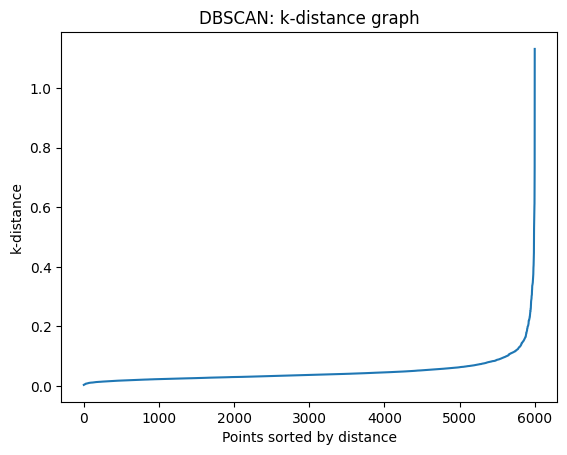

In [49]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:,-1])
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("DBSCAN: k-distance graph")
plt.show()

In [50]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=3)  
df['dbscan_cluster'] = dbscan.fit_predict(X_pca)
print(df['dbscan_cluster'].value_counts())

dbscan_cluster
 0    5967
-1      29
 1       4
Name: count, dtype: int64


In [51]:
mask = df['dbscan_cluster'] != -1
sil_score_db = silhouette_score(X_pca[mask], df['dbscan_cluster'][mask])
print(f"Silhouette Score: {sil_score_db:.3f}")

Silhouette Score: 0.406


In [52]:
print(f"{'Algorithm':<15} | {'Silhouette':<10}")
print(f"{'K-Means':<15} | {sil_score_km:<10.3f}")
print(f"{'Hierarchical':<15} | {sil_score_hi:<10.3f}")
print(f"{'DBSCAN':<15} | {sil_score_db:<10.3f}")

Algorithm       | Silhouette
K-Means         | 0.309     
Hierarchical    | 0.255     
DBSCAN          | 0.406     
